In [2]:
### List 1 
### Tymoteusz Cieślik
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Asteroids Dataset Introduction

In order to prepare visualisations needed in the first assignment, I chose the set of data concerning the asteroids in the Solar System. The downloaded data was collected by SpaceRocks Team which is a part of NASA and contains information about 4687 asteroids which have been discovered since the 1960s. It consists of 40 columns and each of them describe the characteristics of the objects, such as their velocity, diameter, magnitude, etc. Let's load the data and look at the sample of it.

In [20]:
dataset_asteroids = pd.read_csv('nasa.csv')
dataset_asteroids.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


### First chart
We know that asteroids are called the minor planets of the inner Solar System, and the largest of them are even being called planetoids. These objects, as planets, circle around the sun, but their orbits are a bit different. As the planets are moving on a more of a circle-like orbits, the asteroids revolve on a much more elliptic loop. That difference is represented by an eccentricity parameter that tells us how much the orbit is curved/tilted from a circular one. The bigger the change, the bigger value it takes. The next graph present the histogram and density plot of it.

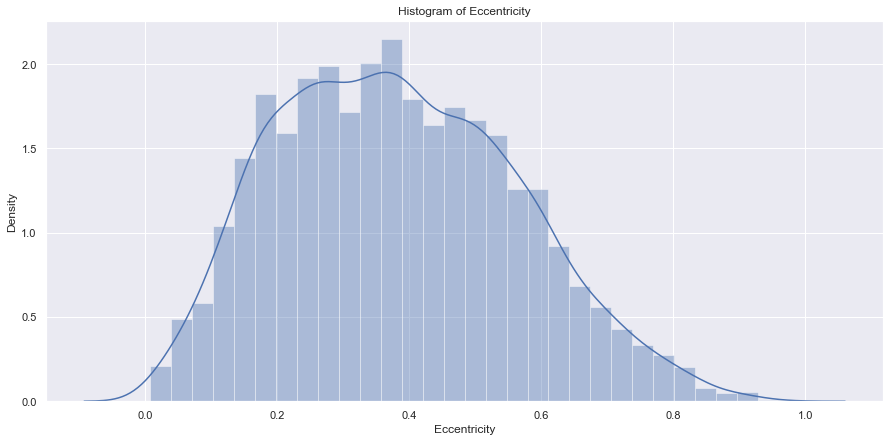

In [19]:
g = sns.distplot(dataset_asteroids['Eccentricity'])
plt.title('Histogram of Eccentricity')
sns.set(rc={'figure.figsize':(10,7)})
plt.show()

As we can notice, the values of the eccentricity of asteroids fall within the range of 0 and 1. That means that all of the orbits are elliptical. There are no values greater than 1, what indicates that none of the orbits are parabolic or hyperbolic, meaning that each asteroid is periodical.

### Second chart

We determined before that all of the asteroids move around the sun at different shapes of orbits. It means that they are really similar to the inner planets, besides their sizes. What seems to be important is that the planets have to preserve the 3rd Kepler Law, which poses that the ratio of the square of an object's orbital period with the cube of the semi-major axis of its orbit is the same for all objects orbiting the same primary. The same situation should apply to asteroids which we can check on the graph using the parameters from the dataset. Firstly we want to see the relationship between the Semi Major Axis and Orbital Period.

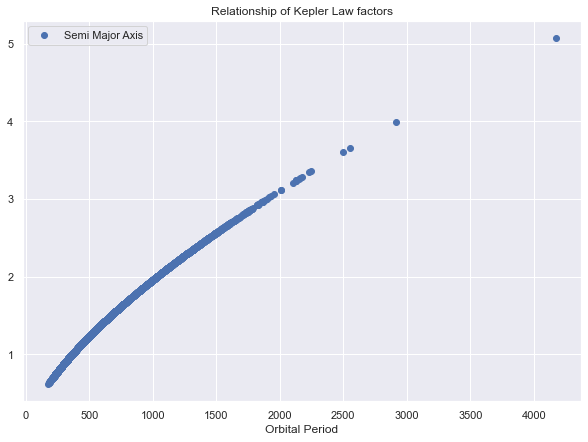

In [21]:
dataset = dataset_asteroids
dataset.plot(x = 'Orbital Period', y = 'Semi Major Axis', style = 'o')
plt.title('Relationship of Kepler Law factors')
sns.set(rc={'figure.figsize':(10,7)})
plt.show()

It's easy to notice that the values are following a certain pattern. Now if we show this ratio as it's described by the Kepler Law we obtain values that are very similar to each other.

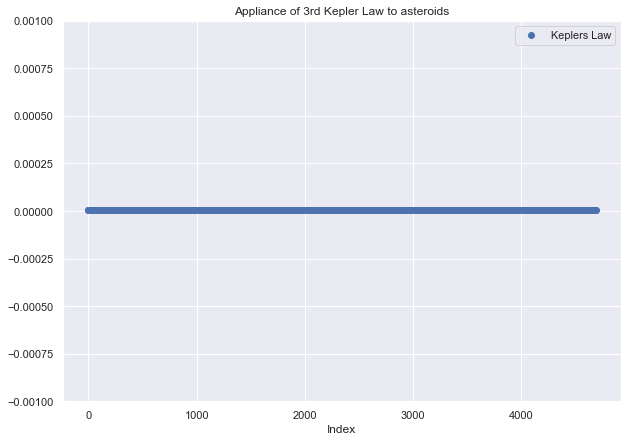

In [22]:
dataset['OPsquared'] = pd.Series(dataset['Orbital Period']**2, index=dataset.index)
dataset['ADcubed'] = pd.Series(dataset['Semi Major Axis']**3, index=dataset.index)
dataset['Keplers Law'] = pd.Series(dataset['ADcubed']/dataset['OPsquared'], index=dataset.index)
ids = [i for i in range(len(dataset['ADcubed']))]
dataset['Index'] = pd.Series(ids, index=dataset.index)
dataset.plot(x = 'Index', y = 'Keplers Law', style = 'o', ylim = (-0.001,0.001))
plt.title("Appliance of 3rd Kepler Law to asteroids")
sns.set(rc={'figure.figsize':(10,7)})
plt.show()

### Third chart
This time we will try to focus on the hazardousness of the asteroids. There are many of them in the Solar System and it's not unusual for some of them to change its course and fly out of their orbit, keeping its properties. We will try to check whether some of them are hazardous not only to the Earth but to any big enough object in our System that can be impacted by it. One of the most essential factors in analysing the potential danger according to NASA specialists are the Velocity, Diameter and the distance to the Sun at its lowest (Perihelion). We can compare these characteristics on the following chart.

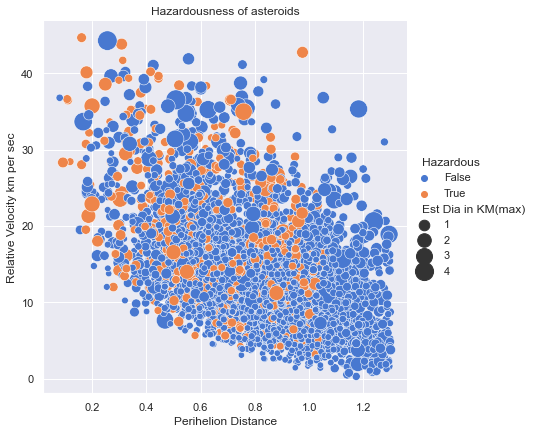

In [24]:
index_names = dataset_asteroids[dataset_asteroids['Est Dia in KM(max)'] > 5 ].index
dataset_asteroids.drop(index_names, inplace = True)
sns.relplot(x='Perihelion Distance', y='Relative Velocity km per sec', hue="Hazardous", size="Est Dia in KM(max)",
            sizes=(40, 400), palette="muted",
            height=6, data=dataset_asteroids)
plt.title("Hazardousness of asteroids")
sns.set(rc={'figure.figsize':(12,7)})
plt.show()

What we can conclude from the graph is that it is really difficult to indicate what impacts an asteroid the most on being marked as hazardous. At the first glance, it doesn't follow any particular pattern. We can only notice that the asteroids which perihelion exceeds the distance of 1 billion kilometers are marked as non-hazardous, while most of the bigger asteroids are closer to the Sun and their velocity is higher what could make them more dangerous.

### Fourth chart

Another thing worth analysing is the impact of the diameter on the orbit uncertainity of the asteroid. To be precise, asteroids are divided into ten categories of uncertainity as the logarithmic parameter. Each of the levels describes the anticipated longitudinal uncertainty in the minor planet's mean anomaly after 10 years. The bigger the value, the less information we have about the asteroid location  in the next 10 years, what could cause a problem in detecting them. Of course, knowledge of the position of the bigger asteroids is natural, but detecting the smaller ones may be very complex. This relationship is presented on the next graph.

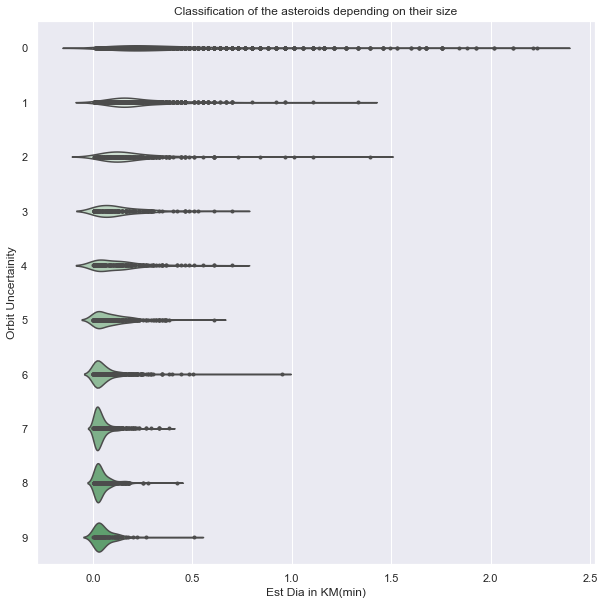

In [27]:
sns.violinplot(data=dataset_asteroids, x = 'Est Dia in KM(min)', y = "Orbit Uncertainity", palette="light:g", inner="points", orient="h")
plt.title("Classification of the asteroids depending on their size")
sns.set(rc={'figure.figsize':(12,10)})
plt.show()

It seems that the smaller the asteroids are the the more difficult it is to determine their location and the real shape of the orbit. Bigger asteroids are much more visible to the researchers and it's quite easier to predict their movement, which is reflected in the classification.

### Fifth chart
Now we would also like to compare the asteroids' velocity and their orbit uncertainity. It is also more difficult to locate the faster object what makes it even more hazardous in the future. As the asteroids in our dataset are already classified we can check whether it really affects the level of the danger posed.

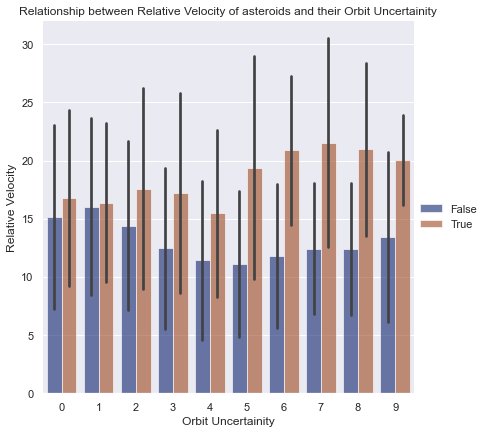

In [30]:
g = sns.catplot(
    data=dataset_asteroids, kind="bar",
    x="Orbit Uncertainity", y="Relative Velocity km per sec", hue="Hazardous",
    ci="sd", palette="dark", alpha=.6, height=6
).set(title='Relationship between Relative Velocity of asteroids and their Orbit Uncertainity')
g.despine(left=True)
g.set_axis_labels("Orbit Uncertainity", "Relative Velocity")
sns.set(rc={'figure.figsize':(20,12)})
g.legend.set_title("")

The chart shows that if the trajectory of the orbit is commonly known, the velocity of the asteroids doesn't really affect the classification of hazardousness. On the other hand the bigger value in orbit uncertainity parameter it takes, the bigger part of the faster objects are classified as hazardous. It makes a lot of sense, because the faster the object is while its orbit is not predictable, the more dangerous it becomes.

### Unique chart
In the last chart, we would like to find out about the correlation between the most important parameters of the dataset. It would help us determine which ones may go together and which repel each other, and that leads to gaining more knowledge about them. 

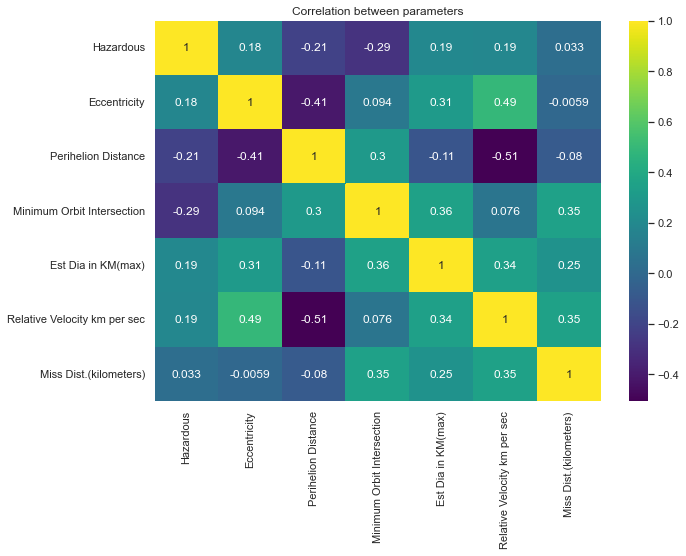

In [32]:
dataset_corr = dataset_asteroids[['Hazardous','Eccentricity','Perihelion Distance','Minimum Orbit Intersection','Est Dia in KM(max)', 'Relative Velocity km per sec', 'Miss Dist.(kilometers)']]
sns.heatmap(dataset_corr.corr(), annot = True, cmap = 'viridis')
plt.title("Correlation between parameters")
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

As it's shown on the chart, most of the factors are uncorrelated or poorly correlated with each other. The only impactful ones describe that the speed of the asteroid generally decreases as it is located further from the Sun which is the consequence of the Kepler Law. The second issue is that the velocity often goes hand in hand with the eccentricity because the more elliptic the orbit is, the higher the speed an asteroid can develop at certain moments.